In [1]:
import pandas as pd # read data from a CSV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import datasets, ensemble
from sklearn.linear_model import LinearRegression
import math
import numpy as np

from sklearn import datasets, ensemble
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.inspection import permutation_importance # shuffling_idx  X_permuted

In [2]:
data=pd.read_csv(r"../data_prep/prism_df_summer_13340600.csv")  #12413370,13266000, 13311000, 13340600

print(data)
print(data.columns)

     Unnamed: 0        Date  ppt..mm.  tmin..degrees.C.  tmean..degrees.C.  \
0           152  2017-06-01      0.00              11.0               18.6   
1           153  2017-06-02      3.30              10.3               13.9   
2           154  2017-06-03      0.01               8.9               16.5   
3           155  2017-06-04      1.17               9.5               20.1   
4           156  2017-06-05      5.62               8.6               16.3   
..          ...         ...       ...               ...                ...   
639        2367  2023-08-27      0.00              11.7               22.5   
640        2368  2023-08-28      0.00              14.2               24.4   
641        2369  2023-08-29      0.00              13.8               24.6   
642        2370  2023-08-30     12.14              11.7               21.4   
643        2371  2023-08-31      7.26              10.9               12.6   

     tmax..degrees.C.  tdmean..degrees.C.  vpdmin..hPa.  vpdmax

In [3]:
data[[ 'tmax..degrees.C.','X_00010_00001']].corr()

,tmax..degrees.C.,X_00010_00001
tmax..degrees.C.,1.000000,0.767103
X_00010_00001,0.767103,1.000000


                    ppt..mm.  tmin..degrees.C.  tmean..degrees.C.  \
ppt..mm.            1.000000         -0.159309          -0.408272   
tmin..degrees.C.   -0.159309          1.000000           0.863712   
tmean..degrees.C.  -0.408272          0.863712           1.000000   
tmax..degrees.C.   -0.495165          0.701470           0.964826   
tdmean..degrees.C.  0.150705          0.659935           0.396837   
vpdmin..hPa.       -0.399309          0.608614           0.774918   
vpdmax..hPa.       -0.469011          0.604553           0.902402   
X_00010_00001      -0.376657          0.632860           0.772287   
X_00010_00003      -0.368561          0.637904           0.771203   
X_00060_00003       0.385678         -0.333079          -0.484543   
doy                -0.185596          0.285003           0.403861   

                    tmax..degrees.C.  tdmean..degrees.C.  vpdmin..hPa.  \
ppt..mm.                   -0.495165            0.150705     -0.399309   
tmin..degrees.C.       

<Axes: >

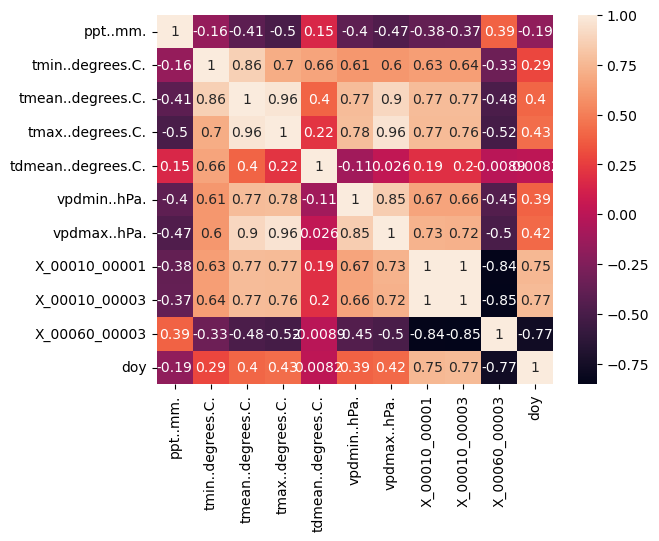

In [4]:
all_idv=[ 'ppt..mm.' 
     , 'tmin..degrees.C.'
     ,'tmean..degrees.C.'
     , 'tmax..degrees.C.', 'tdmean..degrees.C.',
      'vpdmin..hPa.', 
     'vpdmax..hPa.', 
        'X_00010_00001', # dep
  'X_00010_00003',  # dep
       'X_00060_00003' #,   'yr', 'mo',
     ,'doy' ]
corr_matrix= data[ all_idv].corr()
print( corr_matrix )
sns.heatmap(corr_matrix, annot=True)

                   ppt..mm.  tmean..degrees.C.  vpdmax..hPa.  X_00060_00003
ppt..mm.           1.000000          -0.408272     -0.469011       0.385678
tmean..degrees.C. -0.408272           1.000000      0.902402      -0.484543
vpdmax..hPa.      -0.469011           0.902402      1.000000      -0.497628
X_00060_00003      0.385678          -0.484543     -0.497628       1.000000


<Axes: >

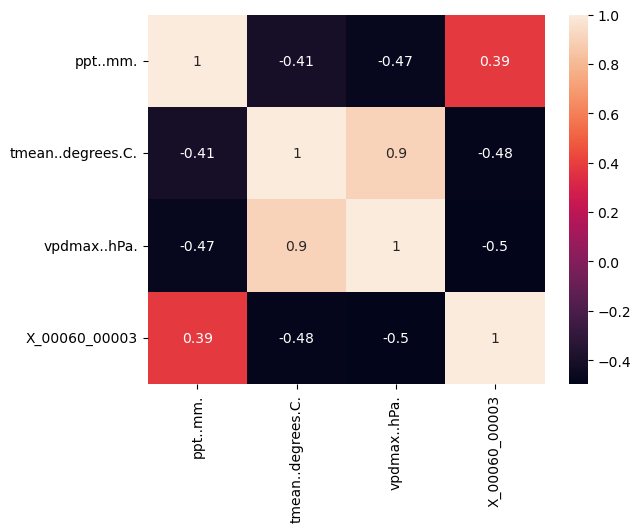

In [5]:
idv=[ 'ppt..mm.' 
     #, 'tmin..degrees.C.'
     ,'tmean..degrees.C.',
    # , 'tmax..degrees.C.', 'tdmean..degrees.C.',
     # ,'vpdmin..hPa.', 
     'vpdmax..hPa.', 
#        'X_00010_00001', # dep
 # 'X_00010_00003',  # dep
       'X_00060_00003' #,   'yr', 'mo',
    # ,'doy'
    ]
corr_matrix= data[ idv].corr()
print( corr_matrix )
sns.heatmap(corr_matrix, annot=True)

In [6]:
#input=  data[  idv].to_numpy()
input=  data[  idv]

X_train, X_test, y_train, y_test = train_test_split( input,  data['X_00010_00003'], test_size=0.2, random_state=42)

print(X_train)
print(y_train)

     ppt..mm.  tmean..degrees.C.  vpdmax..hPa.  X_00060_00003
515      0.00               23.4         39.85           1790
29       0.00               17.9         21.64           3410
274      0.73               16.9         18.05            738
576      0.02               18.8         27.95           2560
434      1.47               22.7         31.66            950
..        ...                ...           ...            ...
71       0.00               23.2         40.17            932
106      0.01               12.4         15.15           5480
270      0.00               15.7         19.44            771
435      0.00               20.8         24.64            925
102      5.17                9.1          9.76           7400

[515 rows x 4 columns]
515    19.0
29     14.9
274    17.4
576    14.6
434    20.3
       ... 
71     19.7
106    10.4
270    17.1
435    19.9
102     7.4
Name: X_00010_00003, Length: 515, dtype: float64


In [7]:
print(idv)
idv2=idv +  ['yr' ]
print(idv2)
idv3=idv2 +  [  'X_00010_00003']
input=  data[  idv2]
#input
X=input[idv2]
X_train=X[X['yr']<2021]
#print(X_train)
X_test=X[X['yr']>=2021]

input2=  data[  idv3]
Y=input2[idv3]
y_train=Y[Y['yr']<2021][  'X_00010_00003']
print(y_train)

y_test=Y[Y['yr']>=2021][  'X_00010_00003']


['ppt..mm.', 'tmean..degrees.C.', 'vpdmax..hPa.', 'X_00060_00003']
['ppt..mm.', 'tmean..degrees.C.', 'vpdmax..hPa.', 'X_00060_00003', 'yr']
0       8.8
1       8.4
2       9.0
3      10.0
4       9.8
       ... 
363    17.5
364    17.4
365    17.0
366    16.5
367    15.6
Name: X_00010_00003, Length: 368, dtype: float64


0.9594531109658451


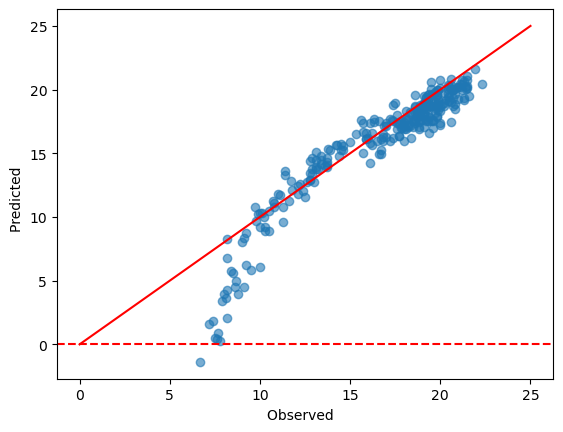

test: 0.9416405178718428
1.2049018841131196


In [8]:
linear_regr = LinearRegression()
linear_regr.fit(  X_train,  y_train )

train_fit= linear_regr.predict(X_train)

train_acc=    np.corrcoef(y_train , train_fit)[0, 1]    

print(train_acc)
yfit = linear_regr.predict(X_test)

plt.scatter( y_test , yfit , alpha=0.6)
plt.axhline(y=0, color='red', linestyle='dashed')
plt.xlabel("Observed  ")
plt.ylabel("Predicted  ")

x = np.linspace(0, 25, 25)
y = x
plt.plot(x, y, color='red')

plt.show()
correlation_coefficient = np.corrcoef(y_test , yfit)[0, 1]

print("test:",correlation_coefficient)
print( mean_absolute_error( y_test , yfit))

In [9]:
max_depths=[1,2,3,4,5,6,7,8,9]

for max_depth in max_depths:
    print("max depth:",max_depth)
    regr = DecisionTreeRegressor( random_state=42 ,max_depth=  max_depth )
    regr.fit(  X_train,  y_train )
    train_fit=regr.predict(X_train)
    yfit = regr.predict(X_test)
    correlation_coefficient = np.corrcoef(y_test , yfit)[0, 1]
    rms = mean_squared_error(y_test, yfit, squared=False)
    # Print the correlation coefficient
    print("test correlation_coefficient:", np.corrcoef(y_train , train_fit)[0, 1] )
    print("test correlation_coefficient:",correlation_coefficient)
    print("MSE:", mean_absolute_error( y_test , yfit ) )
    print("RMS:",rms)

max depth: 1
test correlation_coefficient: 0.8771550747158523
test correlation_coefficient: 0.8627517689948428
MSE: 1.7433425597644705
RMS: 2.138211610856238
max depth: 2
test correlation_coefficient: 0.9421291098062058
test correlation_coefficient: 0.933921760527854
MSE: 1.1885994012105778
RMS: 1.4980585444581098
max depth: 3
test correlation_coefficient: 0.964539783990275
test correlation_coefficient: 0.9453681825452264
MSE: 1.0655138856689395
RMS: 1.369905108849079
max depth: 4
test correlation_coefficient: 0.9767818939539245
test correlation_coefficient: 0.948447229620627
MSE: 1.0661890120877713
RMS: 1.3414282365429524
max depth: 5
test correlation_coefficient: 0.9842877745105406
test correlation_coefficient: 0.9512148130682618
MSE: 1.025458048430336
RMS: 1.290363324300004
max depth: 6
test correlation_coefficient: 0.9891299555032017
test correlation_coefficient: 0.9546526714765213
MSE: 0.9748224632582385
RMS: 1.2454989445204352
max depth: 7
test correlation_coefficient: 0.99245510

max depth: 5
correlation_coefficient: 0.9512148130682618
MSE: 1.025458048430336
RMS: 1.290363324300004


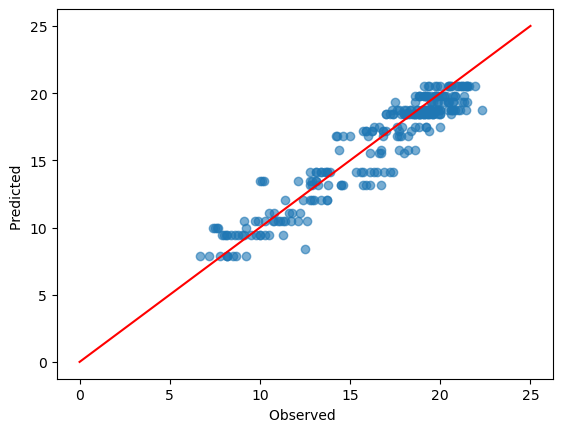

In [10]:
print("max depth:", 5)
regr = DecisionTreeRegressor( random_state=42 ,max_depth=  5)
regr.fit(  X_train,  y_train )
train_fit=regr.predict(X_train)
yfit = regr.predict(X_test)
correlation_coefficient = np.corrcoef(y_test , yfit)[0, 1]
rms = mean_squared_error(y_test, yfit, squared=False)
# Print the correlation coefficient
print("correlation_coefficient:",correlation_coefficient)
print("MSE:", mean_absolute_error( y_test , yfit ) )
print("RMS:",rms)

yfit = regr.predict(X_test)
# Plot the estimated linear regression line with matplotlib:
plt.scatter( y_test , yfit , alpha=0.6)
# Set the x-axis label
plt.xlabel("Observed ")
plt.ylabel("Predicted ")

x = np.linspace(0, 25, 25)
y = x
plt.plot(x, y, color='red')

plt.show()

In [11]:
print(regr.feature_importances_)
print(idv)

[0.00130985 0.06900641 0.0269875  0.89826351 0.00443273]
['ppt..mm.', 'tmean..degrees.C.', 'vpdmax..hPa.', 'X_00060_00003']


In [12]:
params = {
    "n_estimators": 250,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

In [13]:
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

mse = mean_squared_error(y_test, reg.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 1.1043


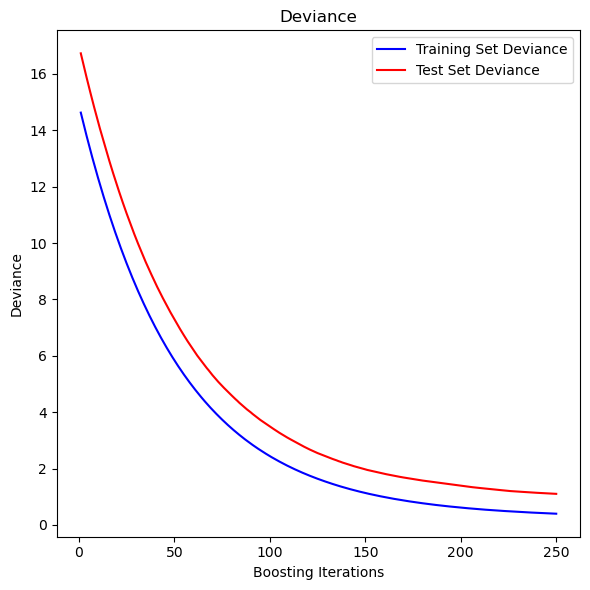

In [14]:
test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = mean_squared_error(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    reg.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

IndexError: index 4 is out of bounds for axis 0 with size 4

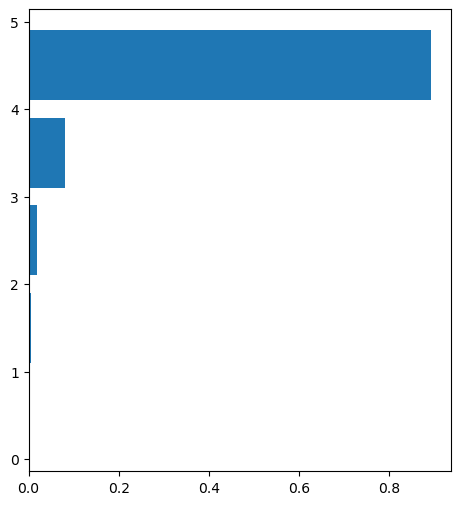

In [15]:
# Careful, impurity-based feature importances can be misleading for high cardinality features (many unique values). 
feature_importance = reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(idv)[sorted_idx])
plt.title("Feature Importance  ")

result = permutation_importance(
    reg, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array( idv)[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

In [16]:
#from sklearn.datasets import load_breast_cancer
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.model_selection import train_test_split

#X, y = load_breast_cancer(return_X_y=True, as_frame=True)
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#clf = RandomForestClassifier(n_estimators=100, random_state=42)
#clf.fit(X_train, y_train)
#print(f"Baseline accuracy on test data: {clf.score(X_test, y_test):.2}")

#X_train

In [17]:
from sklearn.inspection import permutation_importance


def plot_permutation_importance(clf, X, y, ax):
    result = permutation_importance(clf, X, y, n_repeats=10, random_state=42, n_jobs=2)
    perm_sorted_idx = result.importances_mean.argsort()

    ax.boxplot(
        result.importances[perm_sorted_idx].T, # importances : Raw permutation importance scores.
        vert=False,
        labels=X.columns[perm_sorted_idx],
    )
    ax.axvline(x=0, color="k", linestyle="--")
    return ax

The plot on the left shows the Gini importance of the model. 

permuting a feature

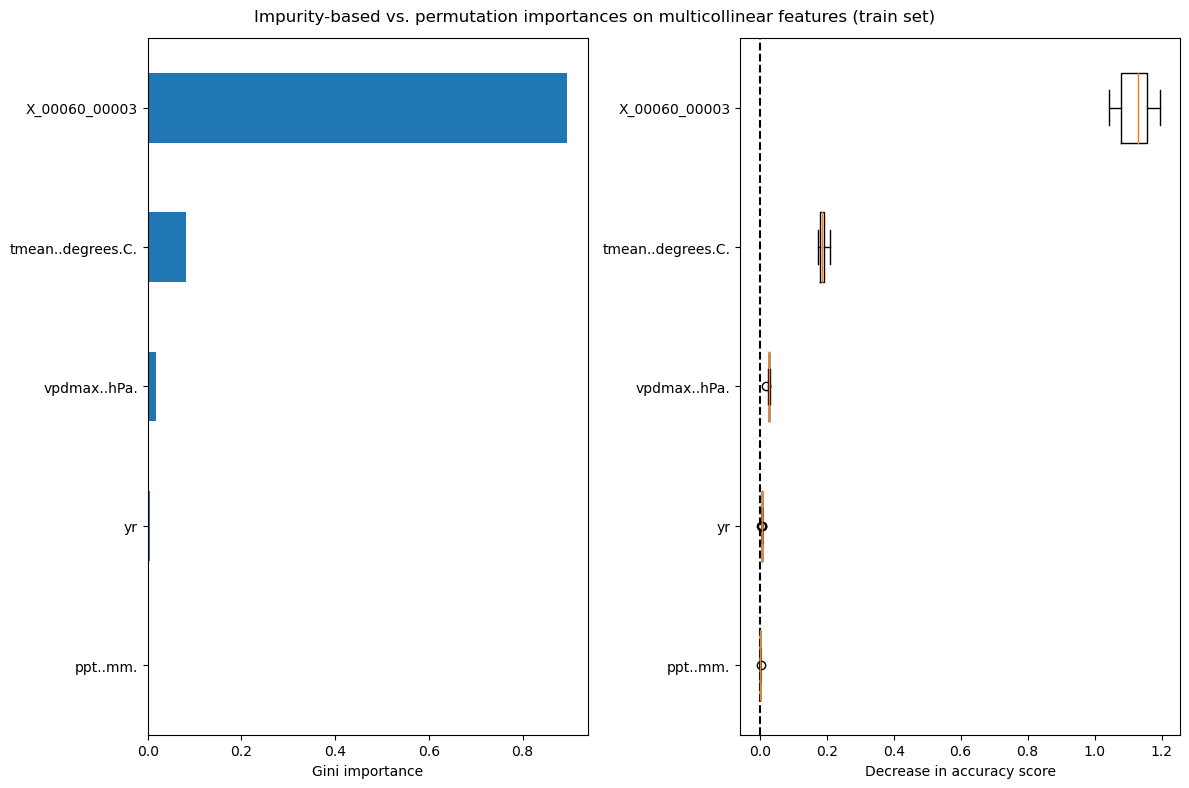

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

mdi_importances = pd.Series(reg.feature_importances_, index=X_train.columns)
tree_importance_sorted_idx = np.argsort(reg.feature_importances_)
tree_indices = np.arange(0, len(reg.feature_importances_)) + 0.5

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
mdi_importances.sort_values().plot.barh(ax=ax1)
ax1.set_xlabel("Gini importance")
plot_permutation_importance(reg, X_train, y_train, ax2)
ax2.set_xlabel("Decrease in accuracy score")
fig.suptitle(
    "Impurity-based vs. permutation importances on multicollinear features (train set)"
)
_ = fig.tight_layout()

correlation_coefficient: 0.9749907826060739
MSE: 0.8384867482488034
RMS: 1.0505467126959407


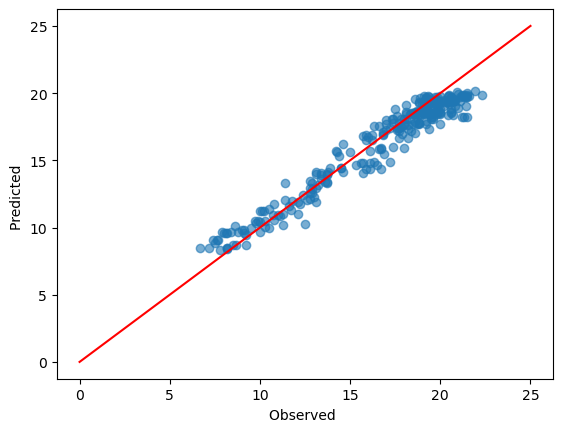

In [19]:
#regr = DecisionTreeRegressor( random_state=42 ,max_depth=  6)
#regr.fit(  X_train,  y_train )
#train_fit=regr.predict(X_train)
#yfit = regr.predict(X_test)

regr = ensemble.GradientBoostingRegressor(**params)
regr.fit(X_train, y_train)
train_fit=regr.predict(X_train)
yfit = regr.predict(X_test)

correlation_coefficient = np.corrcoef(y_test , yfit)[0, 1]
rms = mean_squared_error(y_test, yfit, squared=False)
# Print the correlation coefficient
print("correlation_coefficient:",correlation_coefficient)
print("MSE:", mean_absolute_error( y_test , yfit ) )
print("RMS:",rms)

yfit = regr.predict(X_test)
# Plot the estimated linear regression line with matplotlib:
plt.scatter( y_test , yfit , alpha=0.6)
# Set the x-axis label
plt.xlabel("Observed ")
plt.ylabel("Predicted ")

x = np.linspace(0, 25, 25)
y = x
plt.plot(x, y, color='red')

plt.show()

(array([14., 22., 13., 13., 17., 14., 13., 34., 62., 74.]),
 array([ 8.2925921 ,  9.47875342, 10.66491474, 11.85107607, 13.03723739,
        14.22339871, 15.40956003, 16.59572135, 17.78188267, 18.96804399,
        20.15420531]),
 <BarContainer object of 10 artists>)

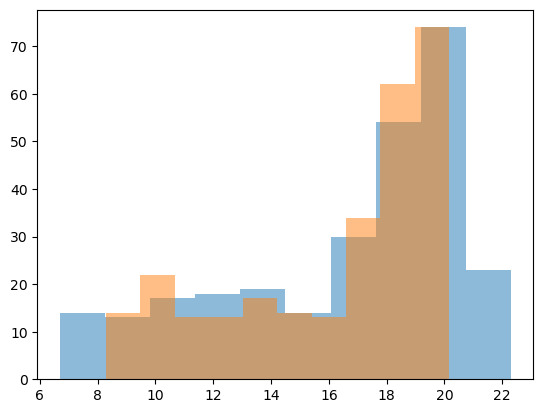

In [20]:
plt.hist(y_test , alpha=0.5)
plt.hist(yfit , alpha=0.5)